In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [52]:
test = pd.read_csv('titanic_test.csv')

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

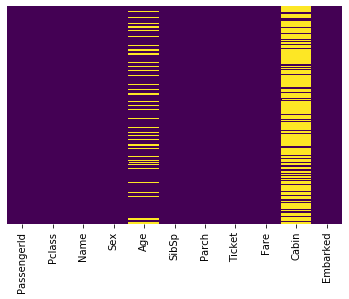

In [55]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

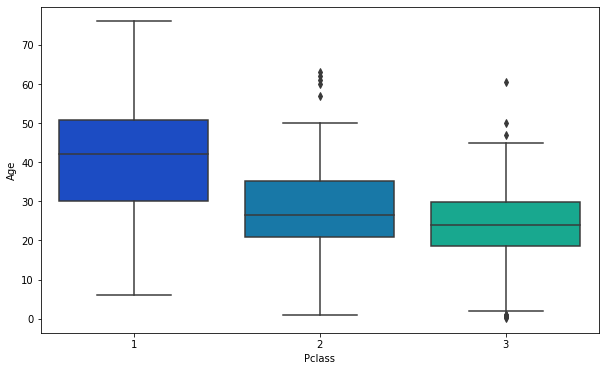

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=test, palette='winter')

In [57]:
def ageFillData(rows):
    age = rows[0]
    pclass = rows[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [58]:
test['Age'] = test[['Age', 'Pclass']].apply(ageFillData, axis=1)

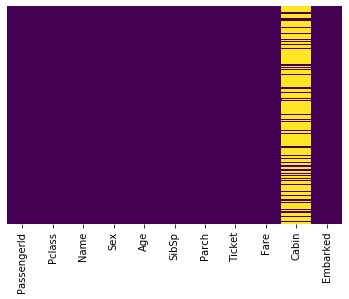

In [59]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [60]:
test.drop('Cabin',axis=1, inplace=True)

In [61]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [62]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [63]:
emb = pd.get_dummies(test['Embarked'], drop_first=True)

In [64]:
test = pd.concat([sex, emb, test], axis=1)

In [65]:
test.head(3)

,male,Q,S,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,0,0,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,1,1,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [70]:
test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

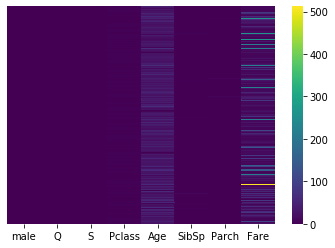

In [72]:
sns.heatmap(test, yticklabels=False, cbar=True, cmap='viridis')